# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[49, 53, 73, ..., 47, 11, 81],
       [86, 68, 51, ..., 47, 93, 83],
       [23, 47, 59, ..., 94,  7, 81],
       ...,
       [ 0, 72, 23, ..., 40, 43, 76],
       [26, 28, 29, ..., 64, 49, 97],
       [66, 19, 36, ..., 15, 27, 40]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [4]:
B = np.transpose(np.random.permutation(np.transpose(A)))
B

array([[81,  3, 74, ..., 66,  6, 50],
       [83, 64, 26, ..., 19, 64,  1],
       [81, 59, 69, ..., 97, 89, 11],
       ...,
       [76, 20, 26, ..., 90, 49, 39],
       [97, 99, 47, ..., 87, 70, 87],
       [40, 23, 78, ..., 31, 27, 46]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [5]:
C = A[A[:,::2].sum(axis=1) > A[:,1::2].mean()]
C

array([[49, 53, 73, ..., 47, 11, 81],
       [86, 68, 51, ..., 47, 93, 83],
       [23, 47, 59, ..., 94,  7, 81],
       ...,
       [ 0, 72, 23, ..., 40, 43, 76],
       [26, 28, 29, ..., 64, 49, 97],
       [66, 19, 36, ..., 15, 27, 40]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [6]:
i = np.argmax(np.max(A, axis=1) - np.min(A, axis=1))
i

3

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [7]:
D = np.argsort(A.reshape(1, len(A)*len(A[0]))).reshape(len(A),len(A[0])) + 1
D

array([[9220, 1041, 2203, ..., 3391, 4067, 6374],
       [9420,  979, 4704, ...,  449, 2440, 6754],
       [4324, 7338, 3143, ..., 8876,  512, 4642],
       ...,
       [4496, 8921, 5281, ..., 6194, 6442, 9133],
       [8091, 9975, 1504, ..., 5677, 7324, 2903],
       [7330, 9552, 6819, ..., 1430, 3942,  766]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массив, в каждой строке которого максимальный элемент равен $1$, минимальный - $0$. 

In [8]:
E = (A - A.min(axis=1)[:1]) / (A.max(axis=1)[:1] - A.min(axis=1)[:1])
E

array([[0.58333333, 0.63095238, 0.86904762, ..., 0.55952381, 0.13095238,
        0.96428571],
       [1.02380952, 0.80952381, 0.60714286, ..., 0.55952381, 1.10714286,
        0.98809524],
       [0.27380952, 0.55952381, 0.70238095, ..., 1.11904762, 0.08333333,
        0.96428571],
       ...,
       [0.        , 0.85714286, 0.27380952, ..., 0.47619048, 0.51190476,
        0.9047619 ],
       [0.30952381, 0.33333333, 0.3452381 , ..., 0.76190476, 0.58333333,
        1.1547619 ],
       [0.78571429, 0.22619048, 0.42857143, ..., 0.17857143, 0.32142857,
        0.47619048]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [9]:
c = np.arange(1, 11).reshape((-1, 1, 1))   # shape: (10, 1, 1)
A * c   # shape: (200, 50) * (10, 1, 1) = (1, 200, 50) * (10, 1, 1) = (10, 200, 50)

array([[[ 49,  53,  73, ...,  47,  11,  81],
        [ 86,  68,  51, ...,  47,  93,  83],
        [ 23,  47,  59, ...,  94,   7,  81],
        ...,
        [  0,  72,  23, ...,  40,  43,  76],
        [ 26,  28,  29, ...,  64,  49,  97],
        [ 66,  19,  36, ...,  15,  27,  40]],

       [[ 98, 106, 146, ...,  94,  22, 162],
        [172, 136, 102, ...,  94, 186, 166],
        [ 46,  94, 118, ..., 188,  14, 162],
        ...,
        [  0, 144,  46, ...,  80,  86, 152],
        [ 52,  56,  58, ..., 128,  98, 194],
        [132,  38,  72, ...,  30,  54,  80]],

       [[147, 159, 219, ..., 141,  33, 243],
        [258, 204, 153, ..., 141, 279, 249],
        [ 69, 141, 177, ..., 282,  21, 243],
        ...,
        [  0, 216,  69, ..., 120, 129, 228],
        [ 78,  84,  87, ..., 192, 147, 291],
        [198,  57, 108, ...,  45,  81, 120]],

       ...,

       [[392, 424, 584, ..., 376,  88, 648],
        [688, 544, 408, ..., 376, 744, 664],
        [184, 376, 472, ..., 752,  56, 648

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [10]:
a1 = A[:,1::2]
a1
a2 = A[:,0::2]
F = np.concatenate((a2, a1), axis=1)
F

array([[49, 73, 67, ..., 66, 47, 81],
       [86, 51,  6, ..., 19, 47, 83],
       [23, 59, 21, ..., 97, 94, 81],
       ...,
       [ 0, 23, 66, ..., 90, 40, 76],
       [26, 29, 71, ..., 87, 64, 97],
       [66, 36, 61, ..., 31, 15, 40]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [11]:
len(A[np.all(A > 5, axis=1)])

10

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [12]:
np.mean(np.split(A, 10), axis=0)

array([[42.8, 44.9, 66. , 51.8, 42.9, 47.7, 36.2, 55. , 47. , 50.2, 39.5,
        55. , 41.6, 39.8, 48.6, 45.5, 63.9, 42.5, 49.8, 67.6, 53.6, 49.2,
        47.3, 42.6, 58.8, 52.2, 43.4, 59.7, 47. , 39.9, 41.4, 45.6, 45. ,
        47.2, 42.3, 51.8, 61.1, 52.3, 50. , 46.6, 37.2, 48.5, 52.6, 38. ,
        33.9, 55.3, 53.9, 38.9, 43. , 63.6],
       [66.5, 60.5, 51.5, 37.4, 50.7, 30.5, 48.5, 45.3, 59.6, 59.9, 48.5,
        27.8, 50.7, 38.7, 52.7, 68. , 28.8, 54.5, 47. , 48.2, 60.9, 73.2,
        61.8, 56.3, 43.2, 55.3, 41.7, 45.8, 46.5, 40.8, 62.5, 42.2, 45.9,
        36.1, 41.9, 42.1, 51.7, 48.8, 53.4, 57.1, 62.8, 63.8, 54.2, 58.1,
        52.7, 51.9, 37.7, 54.8, 58.1, 46.9],
       [71.8, 37. , 48.8, 31.5, 34.1, 54.7, 48.2, 54.6, 53.5, 43. , 38. ,
        51.8, 47.2, 47.9, 28.9, 44.7, 55.5, 48.3, 58.5, 41.9, 52.2, 54.6,
        51.4, 53.8, 53.8, 34.7, 64.5, 41.8, 41.2, 48.3, 50.7, 66.7, 68. ,
        51.7, 47.2, 49.9, 46. , 45.5, 39.4, 49.5, 38.7, 54.4, 33.6, 56.5,
        50.9, 49.9, 53

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [13]:
_, ind = np.unique(A, return_index=True)
J = A.reshape((1, len(A) * len(A[0])))
J[0][np.sort(ind)]  

array([49, 53, 73, 63, 67, 27, 45, 19, 47, 68,  8, 32, 84, 14, 12, 31, 62,
       20, 61,  3, 24, 23,  1, 35, 76, 44,  6, 50,  7, 80, 55,  0, 74, 60,
       66, 81, 11, 86, 51, 28, 54, 42, 65, 46, 52, 92, 29, 33, 64, 99, 41,
       40, 16, 79, 70, 57, 82, 26, 95, 96, 91, 15, 93, 83, 59, 21, 48, 37,
       77,  9, 72, 89, 69,  2, 38, 97, 94, 87, 13, 17, 78, 85,  4, 18, 75,
       98, 56, 36, 34, 71, 22, 39, 25,  5, 90, 88, 10, 30, 58, 43])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [14]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)

array([191.86474833, 205.455644  , 190.2851325 , 215.73039111,
       213.90538013, 198.0246996 , 192.68923595, 222.08552778,
       213.51068275, 217.80344729, 213.05987809, 213.20373273,
       185.89258094, 192.62492479, 190.86545431, 192.01273825,
       194.51912926, 210.54484475, 233.28172164, 203.57234992,
       224.41225824, 210.88473546, 198.75497893, 192.43461656,
       185.1355764 , 211.82013986, 199.13423023, 197.83172559,
       214.77446694, 216.02743263, 187.64943818, 194.32048695,
       209.59733216, 196.76748118, 192.15046617, 227.14354855,
       225.71398196, 193.0958613 , 179.6059065 , 214.37208692,
       203.4342932 , 198.59189724, 220.86989756, 182.47904441,
       186.57127767, 183.32130714, 186.92603256, 196.55437327,
       195.15240621, 228.79410318, 187.84768205, 223.52165812,
       177.32256385, 209.87463317, 204.08750978, 191.1995859 ,
       178.64300056, 189.86253356, 212.09281376, 199.85320025,
       207.21959765, 185.28672821, 210.57998872, 198.01

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [15]:
np.where(A < 50, 2 * A, 3 * A)

array([[ 98, 159, 219, ...,  94,  22, 243],
       [258, 204, 153, ...,  94, 279, 249],
       [ 46,  94, 177, ..., 282,  14, 243],
       ...,
       [  0, 216,  46, ...,  80,  86, 228],
       [ 52,  56,  58, ..., 192,  98, 291],
       [198,  38,  72, ...,  30,  54,  80]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [16]:
def moving_average(arr:np.ndarray, window_size: int) -> np.ndarray:
    return np.convolve(arr[0], np.ones(window_size) / window_size, mode='valid') 
    
V = A.reshape((1, len(A) * len(A[0])))
V3 = moving_average(V, 3)
V5 = moving_average(V, 5)
V10 = moving_average(V, 10)

V5 = np.concatenate((V5,  np.zeros(V3.shape[0] - V5.shape[0])))
V10 = np.concatenate((V10,  np.zeros(V3.shape[0] - V10.shape[0])))
V3 + V5 + V10

array([170.43333333, 166.6       , 167.56666667, ...,  61.4       ,
        28.66666667,  27.33333333])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


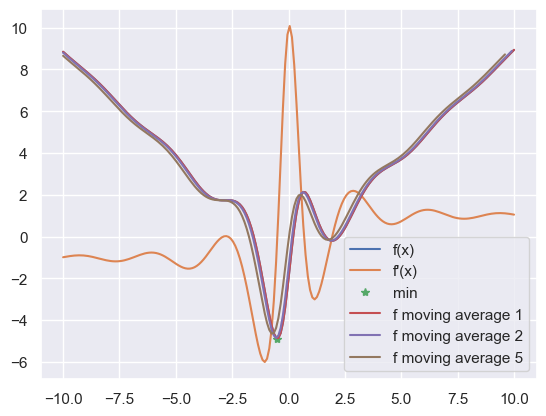

In [17]:
# Построй график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$ и производной этой функции 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.misc import derivative
from typing import Union, Callable


def f(x: np.ndarray) -> np.ndarray:
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

def df(f: Callable[[np.ndarray], np.ndarray], x: np.ndarray) -> np.ndarray:
    return derivative(f, x, dx=1e-6)


x = np.linspace(-10, 10, 200)  # (-10, 10, 1000)
y = f(x) ## (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)
dy = df(f, x)

# print(y)

plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='f\'(x)')

min_f_p = scipy.optimize.fmin_bfgs(f, 0, full_output=True)
x_min, y_min = min_f_p[0][0], min_f_p[1]
plt.plot(x_min, y_min, '*', label='min ') 

Y = y.reshape((1, len(x)))
m_a_1 = moving_average(Y, 1)
m_a_2 = moving_average(Y, 2)
m_a_5 = moving_average(Y, 5)

plt.plot(x, m_a_1, label='f moving average 1')  # ?
plt.plot(x[:len(m_a_2)], m_a_2, label='f moving average 2')
plt.plot(x[:len(m_a_5)], m_a_5, label='f moving average 5')

plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [18]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1    
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 0, 0, 3]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [19]:
def sample_np(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    
    s = np.sum(x)
    val = s * np.random.random(size=c)
    cur = np.cumsum(x)
    idx = np.searchsorted(cur, val)
    return idx

sample_np(np.array([50, 3, 1, 7, 20]), 5)


array([0, 4, 3, 0, 4])

In [20]:
def sample_np2(x, n):
    return np.random.choice(x, n, replace=True)

sample_np2(np.array([50, 3, 1, 7, 20]), 5)


array([ 7,  1, 20,  7, 20])

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [21]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1986

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [22]:
import timeit 

In [23]:
def walk_np(n: int) -> int:
    return np.sum(np.random.choice([-3, -1, 0, 2, 3], size=n))

walk_np(10_000)

1965

In [24]:
print("Function walk: ", timeit.timeit('walk(10000)', globals=globals(), number=1000))
print("Function walk_np: ", timeit.timeit('walk_np(10000)', globals=globals(), number=1000))

Function walk:  4.559789165999973
Function walk_np:  0.20983620900369715


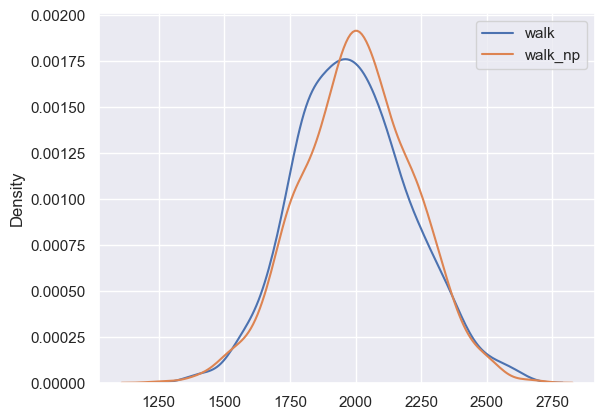

In [25]:
walk_values = [walk(10000) for _ in range(1000)]
walk_np_values = [walk_np(10000) for _ in range(1000)]
sns.kdeplot(walk_values, label='walk')
sns.kdeplot(walk_np_values, label='walk_np')
plt.legend()
plt.show()


# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [26]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.7377616066966667

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [27]:
# import numba 

